# AccelerateAI - Data Science Global Bootcamp

In this notebook, we will look at the concept of partial regression coefficient in MLR. 

Each regression coefficient is the partial derivative if Y w.r.t X. 

In [3]:
import numpy as np
import pandas as pd 

import seaborn as sbn 

import statsmodels.api as sm

In [4]:
# We will use a simple dataset to explain the concept
crime_df = pd.read_csv("10_Crimerate_Data.csv")
crime_df.head()

,County,Population,below5K,Unemployment,Crimerate
0,1,587000,16.5,6.2,11.2
1,2,643000,20.5,6.4,13.4
2,3,635000,26.3,9.3,40.7
3,4,692000,16.5,5.3,5.3
4,5,1248000,19.2,7.3,24.8


The dataset has Population, % house hold with income below 5K, Unemployment rate and the Crime rate of the county. 

We will build a regression model:
Crime rate = F(below5k + Unemployment) 

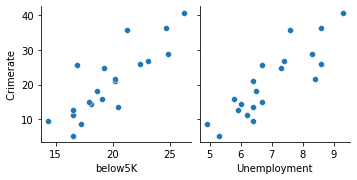

In [5]:
# How does the relation between Crimerate and other 2 variables look?
sbn.pairplot(data=crime_df, 
             x_vars=['below5K', 'Unemployment'], 
             y_vars=[' Crimerate '])

In [6]:
# Training a linear regression model 
Y = crime_df[" Crimerate "]

X = crime_df[["below5K", "Unemployment"]]
X = sm.add_constant(X) # adding a constant

MLR_model = sm.OLS(Y,X).fit()
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Crimerate    R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     34.43
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           1.05e-06
Time:                        15:53:17   Log-Likelihood:                -57.484
No. Observations:                  20   AIC:                             121.0
Df Residuals:                      17   BIC:                             124.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -34.0725      6.727     -5.065   

**Regression Coefficients : below5K = 1.2239, Unemployment = 4.3989**

To demonstrate the partialing of each component in MLR , we will build the following models:<br>
   - Crimerate Vs Unemployment => Call the residuals as R1 
   - below5K   vs Unemployment => Call the residuals as R2
       - Regress R1 on R2          => then check the coefficient 

In [7]:
# Training a linear regression model 
Y = crime_df[" Crimerate "]
X = crime_df["Unemployment"]
X = sm.add_constant(X) # adding a constant

model1 = sm.OLS(Y,X).fit()
R1 = model1.resid

In [8]:
# Training a linear regression model 
Y = crime_df["below5K"]
X = crime_df["Unemployment"]
X = sm.add_constant(X) # adding a constant

model2 = sm.OLS(Y,X).fit()
R2 = model2.resid

In [9]:
Y = R1
X = R2 
X = sm.add_constant(X) # adding a constant

residual_model = sm.OLS(Y,X).fit()
print(residual_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     4.913
Date:                Sun, 04 Sep 2022   Prob (F-statistic):             0.0398
Time:                        15:53:17   Log-Likelihood:                -57.484
No. Observations:                  20   AIC:                             119.0
Df Residuals:                      18   BIC:                             121.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.221e-15      1.010   1.21e-15      1.0

Check the coefficient : 1.2239 => same as the coefficient of below5K (1.2239) in MLR_model. <br>
    **Magic? No - Partialing out phenomenon of regression !! **
    